In [1]:
import pandas as pd 

# Data Gathering

In [2]:
df=pd.read_csv("/kaggle/input/nvidia-stock-historical-data/NVDA (1).csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000
2,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000
3,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000
4,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6393 entries, 0 to 6392
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6393 non-null   object 
 1   Open       6393 non-null   float64
 2   High       6393 non-null   float64
 3   Low        6393 non-null   float64
 4   Close      6393 non-null   float64
 5   Adj Close  6393 non-null   float64
 6   Volume     6393 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 349.7+ KB


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6.393000e+03
mean,5.691514,5.795385,5.583315,5.696717,5.670234,6.073352e+08
std,14.150863,14.406149,13.878611,14.172098,14.174381,4.328103e+08
min,0.034896,0.035547,0.033333,0.034115,0.031291,1.968000e+07
25%,0.276917,0.285500,0.268750,0.275750,0.252925,3.477010e+08
50%,0.455000,0.463000,0.447500,0.455333,0.424676,5.093040e+08
75%,4.125000,4.167750,4.056500,4.118500,4.077091,7.371920e+08
max,132.990005,136.330002,130.690002,135.580002,135.580002,9.230856e+09


In [6]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Data Preprocessing

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df['Volume']=df['Volume'].astype(float)

In [9]:
df.head(1)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-22,0.04375,0.048828,0.038802,0.041016,0.037621,2.714688e+09


In [10]:
#creating new columns daily return
df['Daily_Return'] = df['Adj Close'].pct_change()

In [11]:
df.head(1)

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_Return
0,1999-01-22,0.04375,0.048828,0.038802,0.041016,0.037621,2.714688e+09,NaN


In [12]:
df.replace([float('inf'), float('-inf')], float('nan'), inplace=True)
df = df.dropna()

In [13]:
df = df.dropna()

# Exploratory Data Analysis (EDA)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

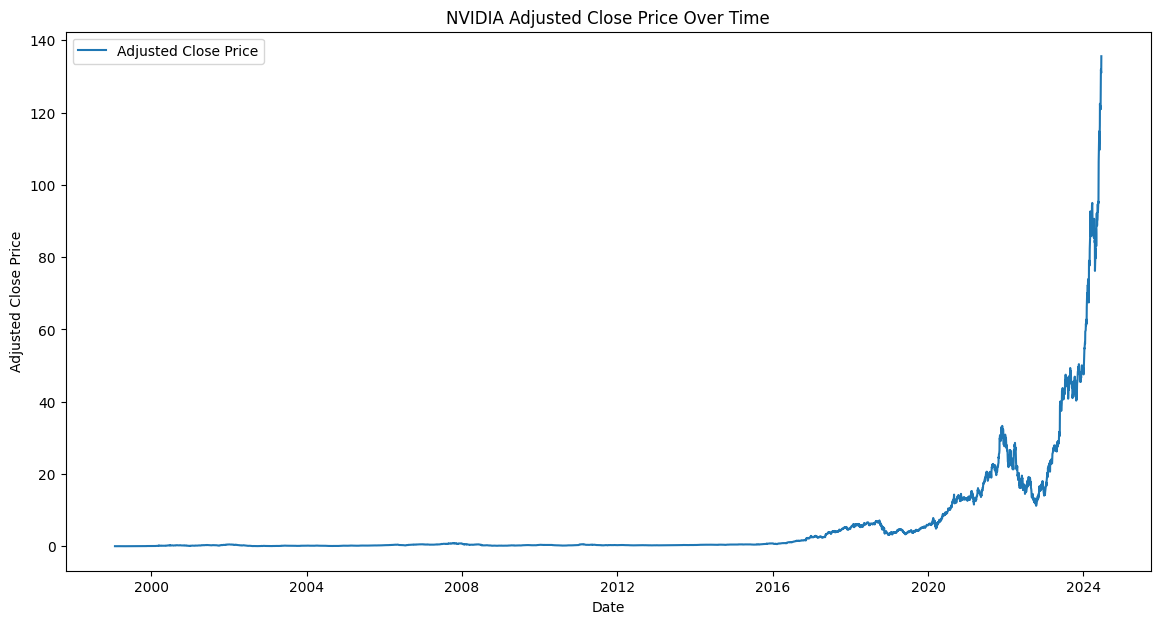

In [15]:
# Plot the closing price
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Adj Close'], label='Adjusted Close Price')
plt.title('NVIDIA Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


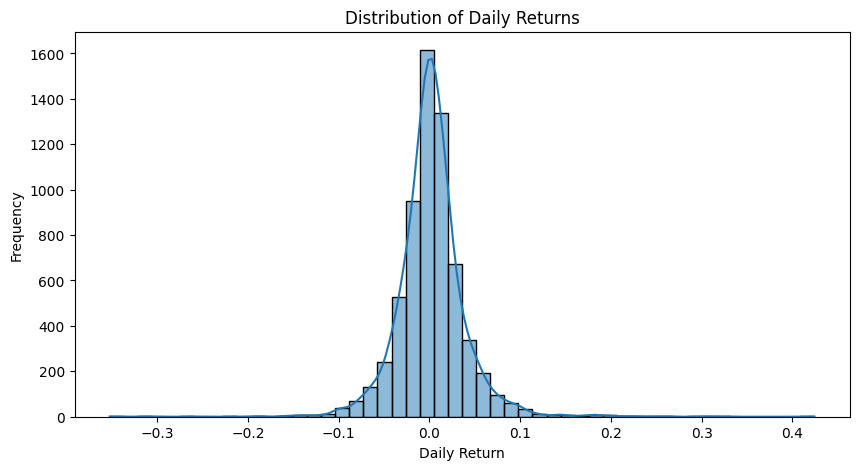

In [16]:
# Distribution of daily returns
plt.figure(figsize=(10, 5))
sns.histplot(df['Daily_Return'], bins=50, kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

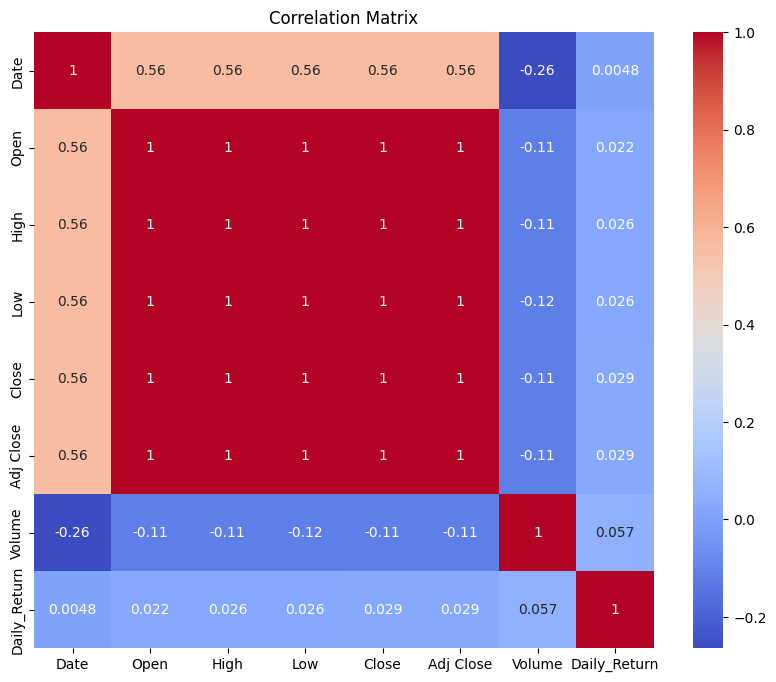

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [18]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_Return
count,6392,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6.392000e+03,6392.000000
mean,2011-10-06 06:45:03.379224064,5.692397,5.796284,5.584182,5.697602,5.671115,6.070055e+08,0.001993
min,1999-01-25 00:00:00,0.034896,0.035547,0.033333,0.034115,0.031291,1.968000e+07,-0.352341
25%,2005-06-01 18:00:00,0.276979,0.285633,0.268750,0.275750,0.252925,3.476188e+08,-0.016159
50%,2011-10-04 12:00:00,0.455125,0.463000,0.447625,0.455541,0.424676,5.090860e+08,0.001295
75%,2018-02-09 18:00:00,4.126375,4.170187,4.056938,4.119625,4.077186,7.371590e+08,0.018227
max,2024-06-18 00:00:00,132.990005,136.330002,130.690002,135.580002,135.580002,9.230856e+09,0.424146
std,NaN,14.151794,14.407097,13.879523,14.173030,14.175315,4.320406e+08,0.037867


# Machine Learning Model

In [19]:
#building ml model that predict stock price and returns
#splitting the data 
from sklearn.model_selection import train_test_split

In [20]:
features = df[['Open', 'High', 'Low', 'Close', 'Volume']]
target = df['Adj Close']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [22]:
#trained the regression model for predict the adjust close price
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = model.predict(X_test)

In [25]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [26]:
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.00019779828214437325
R^2 Score: 0.9999990462444609


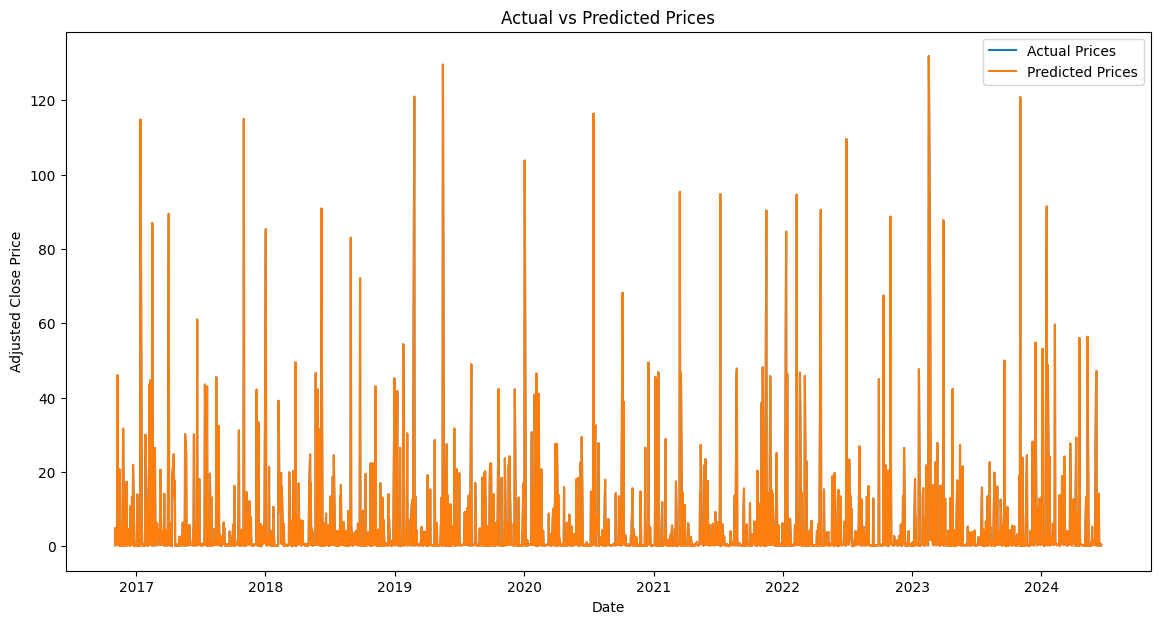

In [27]:
# Plot actual vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(df['Date'].iloc[-len(y_test):], y_test, label='Actual Prices')
plt.plot(df['Date'].iloc[-len(y_test):], y_pred, label='Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()